<a href="https://colab.research.google.com/github/FelipPalermo/DataEng_SC23/blob/main/E8_Tratamento_Inflacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Instalacoes***

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 45 kB/s 
     |████████████████████████████████| 199 kB 44.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=8a53008db2804d03a05b41111bd8ec4a5fbdf37837df94a3ed89e17d8d74c19a
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
# Instalacoes 
pip install pyspark

SyntaxError: ignored

##***Impotacoes***

In [ ]:
# Pandas 
import pandas as pd 
import pandera as pa 


# Pyspark e Funcoes do Pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.types import *
from pyspark.sql.window import Window
from pyspark.sql.functions import *

In [ ]:
# Abrindo dataset da bucket
df = pd.read_csv("https://storage.googleapis.com/bucket_e8_pf/Inflacao_Paises.csv")

##***Tratamento em Pandas***

In [ ]:
# Filtro para pegar apenas os paises que sao relevantes
df = df.loc[(df["LOCATION"] == "BRA") | (df["LOCATION"] == "ARG")]

In [ ]:
# Filtro para pegar apenas os dados anuais
df = df.loc[df["FREQUENCY"] == "A"]

In [ ]:
# Retirando colunas desnecessarias

# Podemos dropar a Frequency porque filtramos por ela e sabemos que tem apenas
# um valor

# Flag codes é apenas nulos
# Measure é apenas AGRWTH	"annual growth"
df.drop(columns=["MEASURE", "FREQUENCY", "Flag Codes"], axis=1, inplace=True)

In [ ]:
# Traduzindo nome das colunas
df.rename(columns={"LOCATION" : "Pais",
                    "INDICATOR" : "Indicador",
                    "SUBJECT" : "Sujeito",
                    "TIME" : "Ano",
                    "Value" : "Valor"}, inplace=True)

In [ ]:
# Reonomenado CPIFORECAST para Inflacao
df.replace("CPIFORECAST", "Inflacao", inplace=True)

In [ ]:
# Procurando por inconsistencias 

# Nao foi encontrado nenhum erro em nenhuma coluna 
sorted(pd.unique(df["Valor"]))

[-1.16667695198682,
 -1.06550342787062,
 -0.939107403163536,
 0.155677818387419,
 0.528587739768843,
 0.924665345259014,
 3.19507629280056,
 3.21176803803376,
 3.37609854585312,
 3.44637335032672,
 3.64127299102652,
 3.66485028376721,
 3.73297621216901,
 4.17733761079798,
 4.18356812896901,
 4.41598601087358,
 4.85844749902668,
 4.88803479876805,
 5.03872690108064,
 5.25258177057424,
 5.40349914037003,
 5.67859390284172,
 6.20431066640105,
 6.27067386493678,
 6.32904015516142,
 6.59718509985968,
 6.63644962213093,
 6.84035902487521,
 6.86953720898966,
 6.9267125162915,
 7.04414105947266,
 7.57800811564256,
 8.30165975585675,
 8.45016437708329,
 8.58437553267839,
 8.73914352329393,
 8.83356970844211,
 9.02990102416125,
 9.64239819992482,
 9.71844096045509,
 9.77538664681339,
 10.0623176536827,
 10.4613092929074,
 10.5997453828849,
 10.6115129405832,
 10.896440304989,
 13.4431434162399,
 13.5785037144501,
 14.7149197228147,
 15.7576656002605,
 16.2273978043767,
 22.1443917410714,
 24.216

In [ ]:
# Alterando ano de string para int 
df["Ano"] = df["Ano"].astype(int)

In [ ]:
# Verificando tipo de cada coluna 
df.dtypes

Pais          object
Indicador     object
Sujeito       object
Ano            int64
Valor        float64
dtype: object

In [ ]:
# Resetando o index das colunas
df = df.reset_index(drop=True)

In [ ]:
# Salvando o DataFrame tratado para CSV sem a coluna de index
df.to_csv("Inflacao_Tratado.csv", index=False)

##***Plotagem com Pandas***

Pais
ARG    AxesSubplot(0.125,0.125;0.775x0.755)
BRA    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

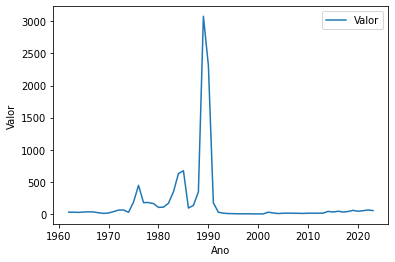

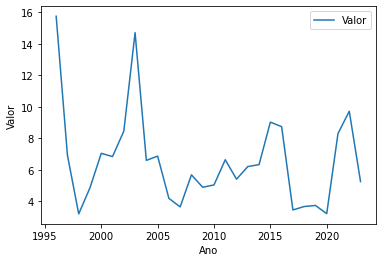

In [ ]:
# Plotando graficos referente a inflacao de cada ano
# Podemos observado que a inflacao da argentina é muito maior que a do brasil

df.groupby("Pais").plot(x = "Ano", y="Valor", xlabel = "Ano", ylabel = "Valor")

###***Regex com Pandera***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pais       90 non-null     object 
 1   Indicador  90 non-null     object 
 2   Sujeito    90 non-null     object 
 3   Ano        90 non-null     int64  
 4   Valor      90 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.6+ KB


In [ ]:
# Criando Regex com pandera

schema = pa.DataFrameSchema(
      columns = {
          "Pais" :pa.Column(pa.String),
          "Indicador" :pa.Column(pa.String),
          "Sujeito" :pa.Column(pa.String),
          "Ano" :pa.Column(pa.Int),
          "Valor" :pa.Column(pa.Float)
      })

In [ ]:
# Verificando integridade dos dados 
schema.validate(df)

,Pais,Indicador,Sujeito,Ano,Valor
0,BRA,Inflacao,TOT,1996,15.757666
1,BRA,Inflacao,TOT,1997,6.926713
2,BRA,Inflacao,TOT,1998,3.195076
3,BRA,Inflacao,TOT,1999,4.858447
4,BRA,Inflacao,TOT,2000,7.044141
...,...,...,...,...,...
85,ARG,Inflacao,TOT,2019,54.386235
86,ARG,Inflacao,TOT,2020,40.404760
87,ARG,Inflacao,TOT,2021,48.815550
88,ARG,Inflacao,TOT,2022,60.134213


##***PySpark***